<a href="https://colab.research.google.com/github/gyunini/DeepLearning_From_Scratch/blob/main/%EB%B0%91%EC%8B%9C%EB%94%A5ch02_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


# - ch2 퍼셉트론

In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [ ]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [ ]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
w*x
np.sum(w*x) + b

-0.19999999999999996

In [ ]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  elif tmp > 0:
    return 1

In [ ]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  elif tmp > 0:
    return 1

In [ ]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  elif tmp > 0:
    return 1

In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [ ]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


# - ch3 신경망

- 계단함수 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<ipython-input-10-d488cba8c740>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


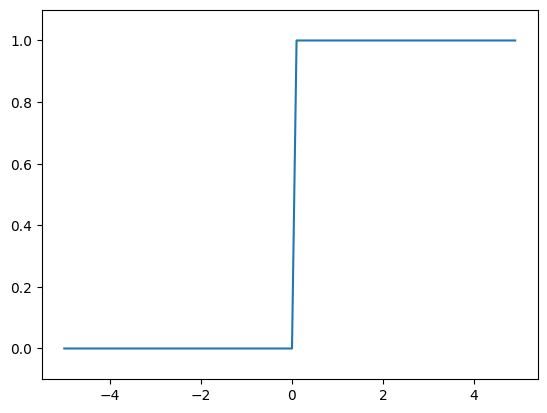

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
print(y)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드 함수 구현

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

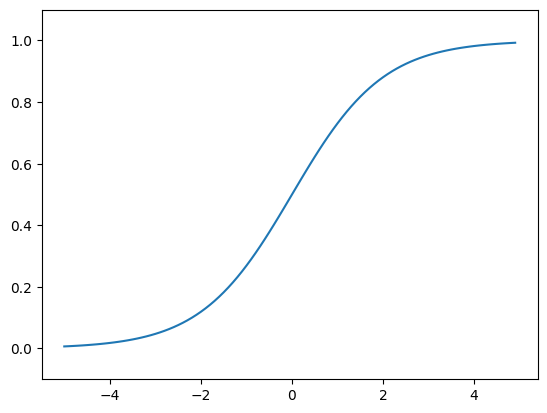

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
def relu(x):
  return np.maximum(0, x)

- 다차원 배열의 계산

In [ ]:
import numpy as np

A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [ ]:
# 이차원 ndarray
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [ ]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [ ]:
# 신경망에서의 행렬의 곱

X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

Y = np.dot(X, W)

print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


- 3층 신경망 구현하기

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [ ]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- softmax 함수

In [ ]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# 큰 수면 오버플로우가 발생

a = np.array([1010, 1000, 990])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)

c = np.max(a)
print(a - c)
print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


<ipython-input-27-0c87d36a5489>:4: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-27-0c87d36a5489>:6: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # 오버플로우 방지
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y)) # 합이 1

[0.01821127 0.24519181 0.73659691]
1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/2023_AI')
from mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from mnist import load_mnist
import numpy as np
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img)) # 넘파이 배열을 PIL용 객체로 변환 : Image.fromarray()이용
  pil_img.show()

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 다시 원래 크기로 변환해야함
# print(img)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


- MNIST 데이터셋으로 추론 수행하는 신경망 구현
- 이미 학습된 가중치 변수를 sample_weight.pkl에서 읽어옴
- 입력층은 (1,784) 첫 번째 은닉층 크기는 50, 두번째 은닉층 크기는 100, 마지막 출력층 크기는 10

In [ ]:
import sys, os
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
  return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/Colab Notebooks/2023_AI/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
x, t = get_data()
print(x.shape)
print(t.shape)
print(t) # 그림에 적힌 숫자인 레이블값이 저장됨
network = init_network()

accuracy_cnt = 0
for i in range(len(x)): # 10000번 반복
  y = predict(network, x[i]) # 크기 (10, )인 확률값 배열 리턴
  p = np.argmax(y) # 확률이 가장 높은 원소의 index 리턴 -> 인덱스를 얻으면 0 ~ 9중 해당 레이블을 나타냄
  if p == t[i]: # 그 인덱스랑, 실제 레이블이랑 같으면 정답을 찾은 것
    accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

(10000, 784)
(10000,)
[7 2 1 ... 4 5 6]


<ipython-input-12-ebbe1fbd659a>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


- 배치 처리
- 앞서 x[i] (크기 1, 784)를 입력으로 넣어줬는데, 이미지 100장 (100, 784)를 한번에 넣어줌
- 즉 하나로 묶은 입력 데이터를 **배치**라고 부름

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size): #  10000개중에서 100개씩 건너뛰면서 반복
  x_batch = x[i:i + batch_size]
  y_batch = predict(network, x_batch) # predict()에 이미지 100장을 한번에 넘김, y_batch는 (100,10) 크기가 나옴
  p = np.argmax(y_batch, axis=1) # axis 1에 대해서! 형상-> (100,)
  accuracy_cnt += np.sum(p == t[i:i + batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9207


<ipython-input-12-ebbe1fbd659a>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


# ch04 - 신경망 학습
## loss function - 오차제곱합(SSE), cross entropy

In [ ]:
# 추정 값 - 2가 0.6으로 제일 높음
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 정답 레이블 - 2가 정답
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

print(sum_squares_error(np.array(y), np.array(t)))

# 7이 제일 높다고 예측
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t))) # SSE값이 커짐 - 오차가 커짐

0.09750000000000003
0.5975


In [ ]:
# cross entropy는 0이 될 수록 오차가 작아짐 - 예측확률이 1이면 log1 = 0이 되어 결국 E = 0이 됨

def cross_entropy_error(y, t):
  delta = 1e-7 # 아주 작은 수
  return -np.sum(t * np.log(y + delta))

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## 미니배치 학습 - SGD

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[12161 11759 15904 39105 42406 53841 48525  6180 35072 31595]


- 배치용 교차 엔트로피 오차 구현하기

In [ ]:
# one-hot incoding일 때

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# 레이블로 주어졌을 때 -> shape가 t_train의 (60000, 10)

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수치 미분 : 아주 작은 차분으로 미분하는 것

In [ ]:
# 나쁜 구현 예

def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h) - f(x)) / h

In [ ]:
# 반올림 오차

print(np.float32(1e-50))

0.0


In [ ]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / 2*h

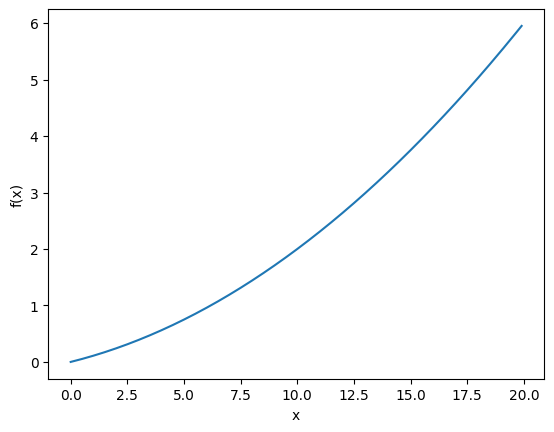

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [ ]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

1.9999999999908982e-09
2.999999999986347e-09


- 편미분일 시 변수가 하나인 임시 함수를 재정의

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.000000000003781e-08


In [ ]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119e-08


- 기울기

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4 #0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for i in range(x.size):
    tmp_val = x[i]
    # f(x+h) 계산
    x[i] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[i] = tmp_val - h
    fxh2 = f(x)

    grad[i] = (fxh1 - fxh2) / (2*h)
    x[i] = tmp_val # 값 복원

  return grad

In [ ]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x

In [ ]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)) # 거의 (0,0)에 가까운 결과

[-6.11110793e-10  8.14814391e-10]


In [ ]:
# 학습률이 너무 큰 예 - 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [ ]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x) # 오버플로 대책
  return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
  if t.size == y.size:
    t = t.argmax(axis=1)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [ ]:
from logging import logProcesses
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) # 정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [ ]:
net = simpleNet()
print(net.W)

[[ 1.71817722  1.5812432  -0.27814631]
 [ 0.21214951 -0.75665028 -0.24436174]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p)) # 최댓값의 인덱스
t = np.array([0,0,1]) # 정답 레이블
print(net.loss(x, t))

[ 1.22184089  0.26776067 -0.38681335]
0
2.069441655142971


In [ ]:
def f(W):
  return net.loss(x, t)
# f = lambda W: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.37847146  0.14577443 -0.52424589]
 [ 0.56770719  0.21866165 -0.78636884]]


## 2층 신경망 클래스 구현하기

- 필요 함수들

In [ ]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x) # 오버플로 대책
  return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
  if t.size == y.size:
    t = t.argmax(axis=1)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

- TwoLayerNet 구현

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y[0:5])

[[0.10227621 0.10013357 0.09652692 0.10139329 0.10333478 0.09893057
  0.09597232 0.09605167 0.10648493 0.09889573]
 [0.10247676 0.10020832 0.09646415 0.10152223 0.10374032 0.09884095
  0.09601171 0.09577634 0.1062756  0.09868362]
 [0.10252788 0.09999751 0.09624939 0.10138308 0.10359575 0.09918201
  0.09637833 0.09577226 0.10645523 0.09845856]
 [0.10248414 0.1003743  0.09681203 0.10139722 0.10330148 0.09910252
  0.09593914 0.09570612 0.1062665  0.09861655]
 [0.10306856 0.10040889 0.0964914  0.10127274 0.10350372 0.09880959
  0.09576242 0.09581605 0.10639081 0.09847581]]


In [ ]:
x = np.random.randn(100, 784) # 더미 데이터 100 장 분량
t = np.random.rand(100, 10) # 더미 정답 레이블 100장 분량

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


- 미니배치 학습 구현하기

In [ ]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.09736666666666667, 0.0982
